In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
def preprocess_features(data,columns,bad_values):
    """
    Realiza el preprocesamiento de las características especificadas.

    Args:
    - data (pd.DataFrame): DataFrame original con los datos.

    Returns:
    - data (pd.DataFrame): DataFrame procesado con características adicionales y filas inválidas eliminadas.
    """
    
    # Busca valores 999 o -999 en las columnas especificadas
    invalid_values = data[columns].isin([bad_values, -bad_values]).sum()

    # Filtra y muestra solo las columnas que tienen estos valores inválidos
    columns_with_invalids = invalid_values[invalid_values > 0]

    if columns_with_invalids.empty:
        print(f" Todas las columnas tienen datos válidos, sin valores {bad_values} o -{bad_values}.")
    else:
        print(f"Las siguientes columnas tienen valores {bad_values} o -{bad_values}:\n{columns_with_invalids}")

    # Filtra el DataFrame para excluir filas con valores 999 o -999 en las columnas especificadas
    data = data[~data[columns].isin([bad_values, -bad_values]).any(axis=1)].reset_index(drop=True)

    return data

In [3]:
class DataFrameScaler:
    def __init__(self):
        self.scalers = {}

    def scale(self, df):
        """
        Escala las columnas del DataFrame entre Min y Max 
        """
        scaled_df = df.copy()
        for column in df.columns:
            scaler = MinMaxScaler()
            scaled_df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1)).flatten()
            self.scalers[column] = scaler
        return scaled_df

    def inverse_scale(self, df):
        """
        Devuelve el DataFrame escalado a su estado original.
        """
        original_df = df.copy()
        for column in df.columns:
            scaler = self.scalers.get(column)
            if scaler:
                original_df[column] = scaler.inverse_transform(df[column].values.reshape(-1, 1)).flatten()
        return original_df



In [4]:
from itertools import combinations

def create_color_columns(mag_features, df):
    """
    Crea columnas de colores en el DataFrame df basadas en las combinaciones de mag_features.
    
    Parámetros:
    - mag_features: Lista de características para hacer combinaciones y crear colores.
    - df: DataFrame donde se añadirán las nuevas columnas de colores.
    
    Retorna:
    - df: DataFrame modificado con las nuevas columnas de colores.
    - colors: Lista de los nombres de las nuevas columnas de colores.
    """
    colors = []
    for v in combinations(mag_features, 2):
        df[f"{v[0]}-{v[1]}"] = df[v[0]] - df[v[1]]
        colors.append(f"{v[0]}-{v[1]}")
    return df, colors

In [5]:
df = pd.read_csv('/home/nicolas/nico/Data/Data_Splus/variableStars/short_splusAll_9Filters_modified.csv')

In [6]:
cols = ['mag_psf_u',
       'mag_psf_J0378', 'mag_psf_J0395', 'mag_psf_J0410', 'mag_psf_J0430',
       'mag_psf_g', 'mag_psf_J0515', 'mag_psf_r', 'mag_psf_J0660', 'mag_psf_i',
       'mag_psf_J0861', 'mag_psf_z']

In [7]:
df = preprocess_features(df,cols,999)
df = preprocess_features(df,cols,0)
df = preprocess_features(df,cols,9999)

Las siguientes columnas tienen valores 999 o -999:
mag_psf_u        1126595
mag_psf_J0378     920543
mag_psf_J0395    1992544
mag_psf_J0410     132131
mag_psf_J0430     118287
mag_psf_g          57512
mag_psf_J0515      61922
mag_psf_r          91676
mag_psf_J0660      68512
mag_psf_i         204226
mag_psf_J0861     212041
mag_psf_z         248899
dtype: int64
 Todas las columnas tienen datos válidos, sin valores 0 o -0.
 Todas las columnas tienen datos válidos, sin valores 9999 o -9999.


In [8]:
df,colors = create_color_columns(cols,df)

In [9]:
scaler = DataFrameScaler()
df[colors] = scaler.scale(df[colors])


In [28]:
import matplotlib.pyplot as plt
def plot_features(df, features, save_path='scaled_columns_StandardScaler.png'):
    fig, axs = plt.subplots(11, 6, figsize=(20, 40))  # Puedes ajustar el figsize si es necesario
    axs = axs.ravel()

    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, bins=50, ax=axs[i])
        axs[i].set_title(feature)
        axs[i].set_xlabel("")
        axs[i].set_ylabel("")

    # Si hay menos de 66 características, las gráficas adicionales estarán vacías.
    # Así que las escondemos para que no se muestren.
    for j in range(len(features), 66):
        axs[j].axis('off')

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # dpi es la resolución; puedes ajustarlo según tus necesidades
    plt.show()



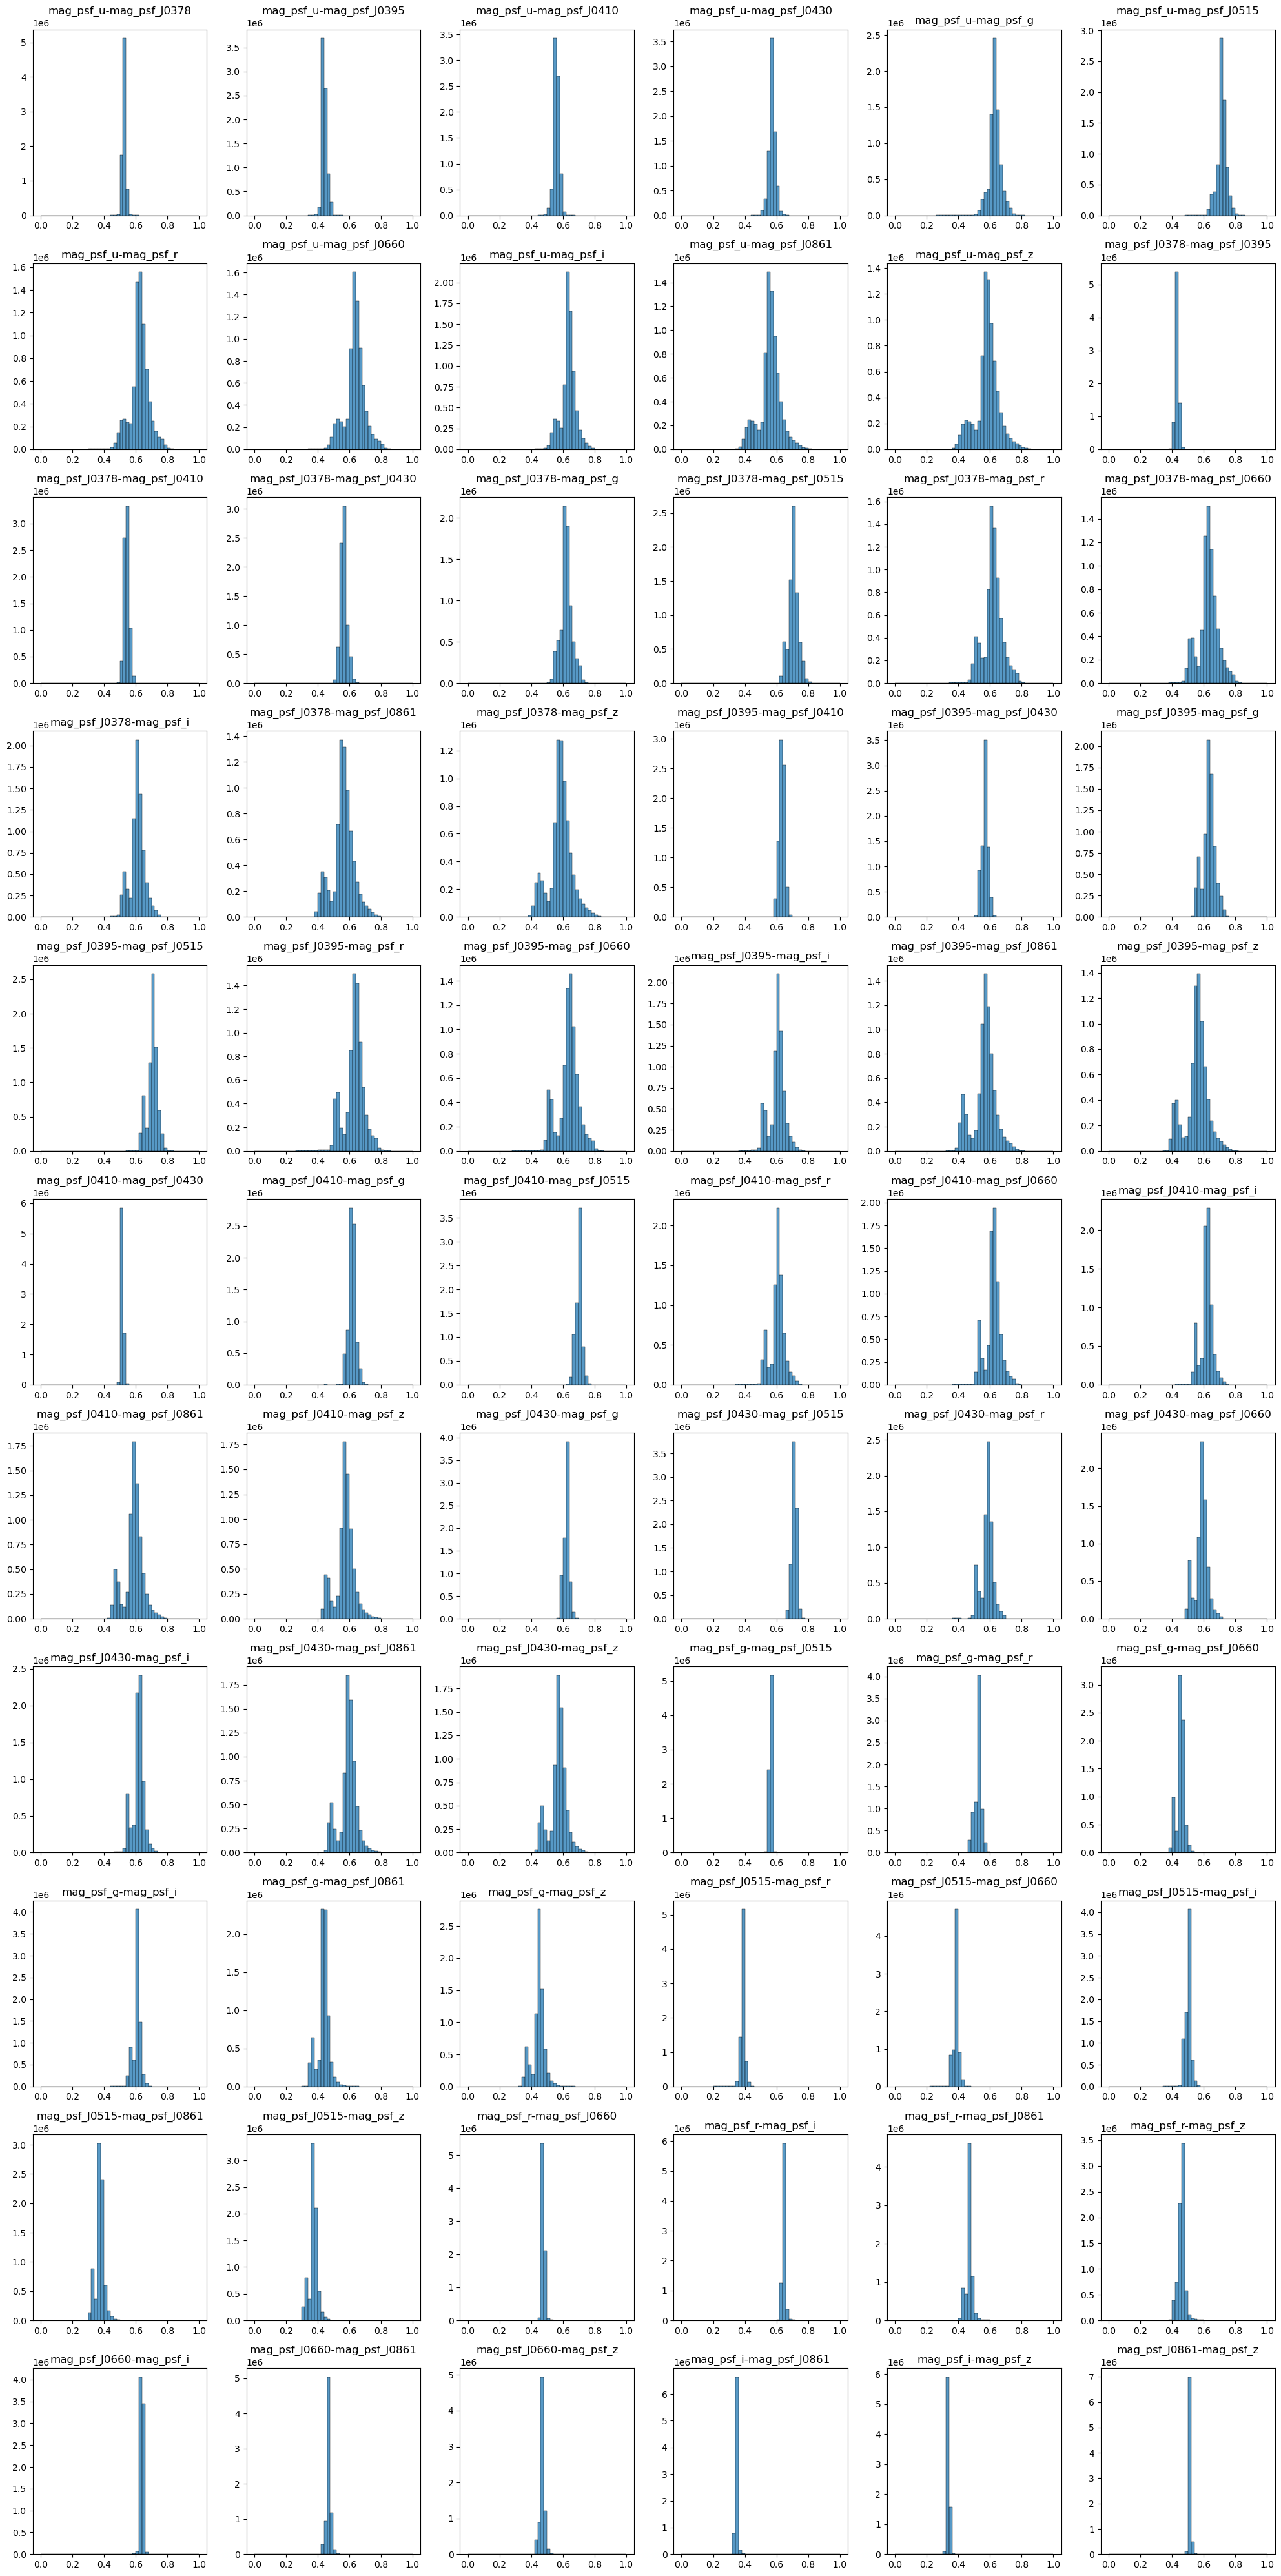

In [29]:
plot_features(df, colors)

In [30]:
df[["splus_oid","Ra","Dec"]].to_csv("Splus_all_filters.csv",index=False)

In [ ]:
df_surveys = pd.read_csv("All_Splus_All_surveys.csv")

In [10]:
df_galah = pd.read_csv("LAMOSDR8-MedimResulution-SPLUS-2023-GAIA.csv")

In [11]:
df_galah

,ID,RA,DEC,u,J378,J395,J410,J430,g,J515,...,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist,above_line,below_line,giagiants
0,iDR4_3_SPLUS-n02n26_0026501,185.183629,1.648059,15.9096,15.5307,15.4695,15.0981,15.0283,14.8116,14.6505,...,MARCS,185.183598,1.648063,0.530184,0.314063,0.0354,0.201989,False,True,NaN
1,iDR4_3_SPLUS-n02n26_0027369,185.165536,1.605206,16.2330,15.8731,15.8259,15.4092,15.3477,15.0811,14.9100,...,PHOENIX,185.165600,1.605223,0.562577,0.348395,-0.0278,0.133913,False,True,NaN
2,iDR4_3_SPLUS-n02n26_0021101,185.322917,1.382529,13.9279,13.5747,13.4983,13.0225,12.9656,12.6911,12.5248,...,MARCS,185.322871,1.382477,0.348959,0.249990,-0.1340,0.204056,False,True,NaN
3,iDR4_3_SPLUS-n02n26_0023506,185.140801,1.469171,14.8031,14.4379,14.3509,13.9108,13.8195,13.5517,13.3991,...,MARCS,185.140806,1.469139,3.742104,3.049171,-0.3266,0.106320,False,True,NaN
4,iDR4_3_SPLUS-n02n26_0028118,185.319477,1.579675,13.7248,13.3632,13.3107,12.8669,12.8011,12.5554,12.3823,...,MARCS,185.319562,1.579532,0.295830,0.207808,-0.2001,0.200616,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,iDR4_3_STRIPE82-0170_0025373,357.936781,0.728426,17.2484,17.0562,16.7103,15.7293,15.4389,14.7230,14.6240,...,PHOENIX,357.936902,0.728741,0.499133,0.214550,-0.0493,0.244240,False,False,NaN
4744,iDR4_3_STRIPE82-0164_0049572,354.808610,1.252015,16.8377,16.5917,16.4131,15.3963,15.1455,14.4177,14.4022,...,PHOENIX,354.808800,1.252205,0.318646,0.236322,0.1131,0.207231,False,False,NaN
4745,iDR4_3_STRIPE82-0164_0032603,354.566334,0.723002,17.3214,16.9961,16.6877,15.8597,15.5167,14.5870,14.5415,...,PHOENIX,354.566028,0.722936,0.686300,0.492844,0.1995,0.176424,False,False,NaN
4746,iDR4_3_STRIPE82-0163_0042027,354.329451,-0.385890,18.5122,18.1151,17.8208,16.9984,16.6569,15.7217,15.6976,...,MARCS,354.329460,-0.385946,0.498399,0.424195,0.2492,0.163644,False,False,NaN


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='serif', size=15, serif='Times New Roman')
plt.rc('axes', titlesize=14, labelsize=15)

def line(x):
        return ((3.6 - 3.2) / (5000 - 6000)) * (x - 6000) + 3.2     # taken from literature
        
def calculate_boundary_lines(x, y, x1, y1, x2, y2, x3, y3, x4, y4):
    def line_above(x):
        if (x >= x2) and (x <= x1):  # for first line
            return ((y2 - y1) / (x2 - x1)) * (x - x1) + y1

        elif (x >= x3) and (x <= x2):  # for second line
            return ((y3 - y2) / (x3 - x2)) * (x - x2) + y2

    def line_below(x):
        return ((y4 - y1) / (x4 - x1)) * (x - x4) + y4

    df['above_line'] = df[y] < df[x].apply(line_above)
    df['below_line'] = df[y] > df[x].apply(line_below)

    selected_points = df[(df[x] >= 3000) & (df[x] <= 6000) & df['above_line'] & df['below_line']]

    return df, selected_points, ((x1, y1), (x2, y2)), ((x2, y2), (x3, line_above(x3))), ((x3, line_above(x3)), (x3, y4)), ((x3, y4), (x4, y4)), ((x4, y4), (x1, y1))

def plot_data(df, selected_points, additional_lines, xcol, ycol, title):
    plt.figure(figsize=(10, 8))
    
    for line_start, line_end in additional_lines:
        plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'g--')

    sns.scatterplot(x=df[xcol], y=df[ycol], s=2, color='red')
    sns.scatterplot(x=selected_points[xcol], y=selected_points[ycol], s=2, color='blue')

    plt.xlabel('Teff')
    plt.ylabel('logG')
    plt.title(title)
    plt.ylim(5, 0)
    plt.xlim(7500, 3000)
    plt.tight_layout()
    plt.savefig(title+'.png', dpi=300)
    plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

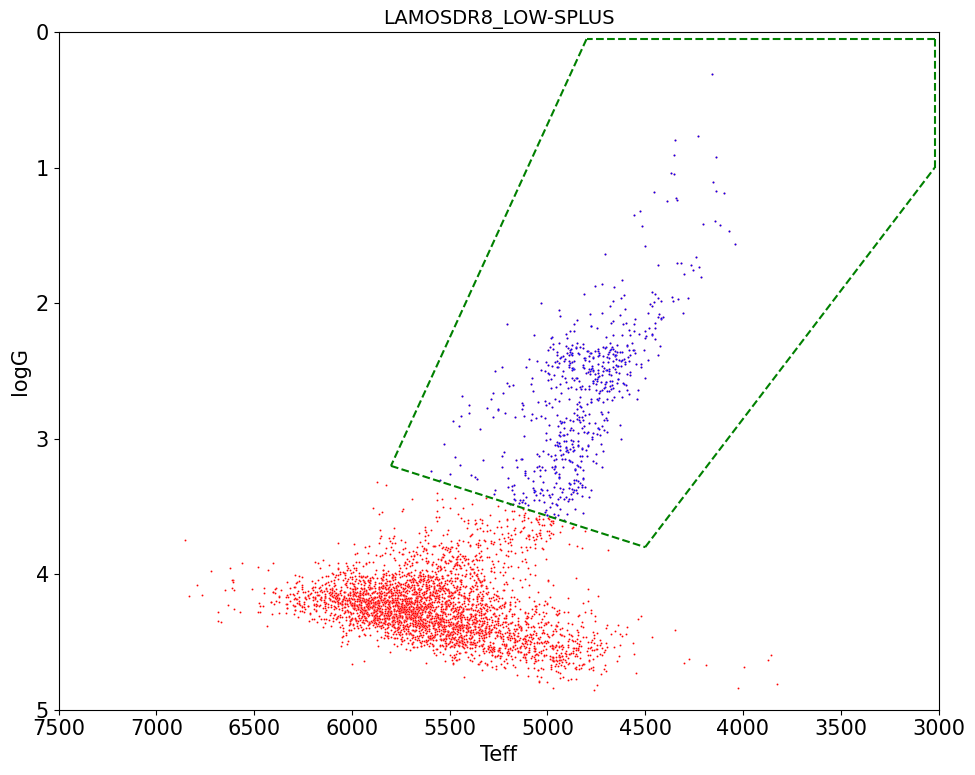

In [84]:
# ----------------- change only this section ----------------------
title = 'LAMOSDR8_LOW-SPLUS'    
df = df_galah.copy()       # define dataframes , you c
xcol = 'teff_cnn'               # define x-column
ycol = 'logg_cnn'               # define y-column

x1, y1 = 5800, 3.2            #starting pt of 1st line
x2, y2 = 4500, line(4500)     #ending pt of 1st line, starting pt of 2nd line
x3, y3 = 3020, 1              #ending pt of 2nd line, starting pt of 3rd line
x4, y4 = 4800, 0.05           #ending pt of 3rd line, starting pt of 4th line

# ----------------- upto this -------------------------------------

df, selected_points, *additional_lines = calculate_boundary_lines(xcol, ycol, x1, y1, x2, y2, x3, y3, x4, y4)
plot_data(df, selected_points, additional_lines, xcol, ycol, title)

In [85]:
df.loc[selected_points.index,"giagiants"] = 1

In [86]:
df.to_csv("LAMOSDR8-MedimResulution-SPLUS-2023-GAIA.csv",index=False)

In [81]:
df.keys().values

array(['ID', 'RA', 'DEC', 'u', 'J378', 'J395', 'J410', 'J430', 'g',
       'J515', 'r', 'J660', 'i', 'J861', 'z', 'ebv_sfd', 'e_u', 'e_J0378',
       'e_J0395', 'e_J0410', 'e_J0430', 'e_g', 'e_J0515', 'e_r',
       'e_J0660', 'e_i', 'e_J0861', 'e_z', 'mobsid', 'obsid', 'uid',
       'gp_id', 'designation', 'obsdate', 'lmjd', 'mjd', 'planid', 'spid',
       'fiberid', 'lmjm', 'band', 'ra_obs', 'dec_obs', 'snr',
       'gaia_source_id', 'gaia_g_mean_mag', 'gaia_bp_mean_mag',
       'gaia_rp_mean_mag', 'tsource', 'fibertype', 'tfrom', 'tcomment',
       'offsets', 'offsets_v', 'ra', 'dec', 'teff_lasp', 'teff_lasp_err',
       'logg_lasp', 'logg_lasp_err', 'feh_lasp', 'feh_lasp_err',
       'vsini_lasp', 'vsini_lasp_err', 'rv_b0', 'rv_b0_err', 'rv_b1',
       'rv_b1_err', 'rv_b_flag', 'rv_r0', 'rv_r0_err', 'rv_r1',
       'rv_r1_err', 'rv_r_flag', 'rv_br0', 'rv_br0_err', 'rv_br1',
       'rv_br1_err', 'rv_br_flag', 'rv_lasp0', 'rv_lasp0_err', 'rv_lasp1',
       'rv_lasp1_err', 'coadd', 'fi

In [89]:
ls

OB-stars/  Splus_parameterEstimation/


In [ ]:
df[["RA","DEC",]]